
image 1/1 c:\Users\cuong\workspace\ml-tools\cicle-detector\images\bo du lieu bia so 4\bia4 (456).bmp: 480x640 131.0ms
Speed: 1.2ms preprocess, 131.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
image 1/1 c:\Users\cuong\workspace\ml-tools\cicle-detector\images\bo du lieu bia so 4\bia4 (456).bmp: 480x640 131.0ms
Speed: 1.2ms preprocess, 131.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


C:\Users\cuong\AppData\Local\Temp\ipykernel_37636\3159210590.py:47: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  pts = np.array(pts8[:8], dtype=np.int32).reshape((4, 2))


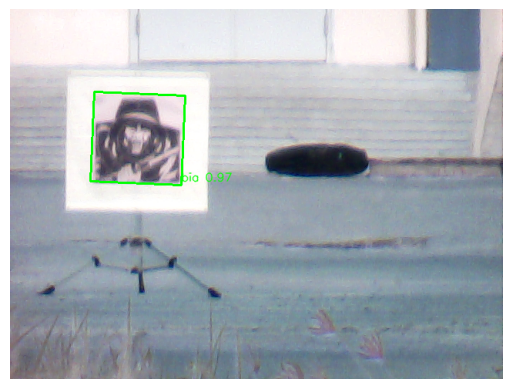

In [58]:
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
from functools import reduce
from PIL import Image
import math

# Load the YOLO model
model = YOLO('yolo-models/yolo11n-obb_bia-4.01.pt')

def obb_to_points(xc, yc, w, h, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    cos_a = math.cos(angle_rad)
    sin_a = math.sin(angle_rad)
    w2, h2 = w / 2, h / 2

    pts = np.array([
        [-w2, -h2],
        [ w2, -h2],
        [ w2,  h2],
        [-w2,  h2]
    ])

    rot = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    rotated = pts @ rot.T + [xc, yc]
    return np.int32(rotated)

# Function to process an image and detect objects
def process_image(image_path):    
    image = cv2.imread(image_path)
    # Perform object detection
    results = model(image_path)[0]
    
    # Get all needed data
    obb_pts_list = results.obb.xyxyxyxy  # shape: (N, 8)
    confidences = results.obb.conf       # shape: (N,)
    class_ids = results.obb.cls          # shape: (N,)
    names = model.names                  # dict: id -> class name

    for pts8, conf, cls_id in zip(obb_pts_list, confidences, class_ids):
        class_name = names[int(cls_id)]
        if class_name.lower() != "bia":
            continue  # Skip other classes

        pts = np.array(pts8[:8], dtype=np.int32).reshape((4, 2))
        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

        label = f"{class_name} {conf:.2f}"
        x_text, y_text = pts[0]
        cv2.putText(image, label, (x_text, y_text - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
        
    # Show image with labels
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
process_image('images/bo du lieu bia so 4/bia4 (456).bmp')
